In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [13]:
data=pd.read_csv("Advertising.csv")

In [14]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
data=pd.read_csv("Advertising.csv", index_col=0)

In [16]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Exporatory Data Analysis


In [17]:
data.shape

(200, 4)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Data is clean as there are no null values and all the dtype is also float.

In [20]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### First plotting the Sales to have good understanding

<AxesSubplot:xlabel='Sales', ylabel='Density'>

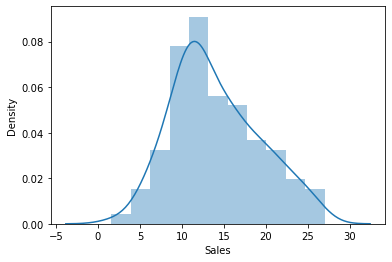

In [22]:
sns.distplot(data.Sales)

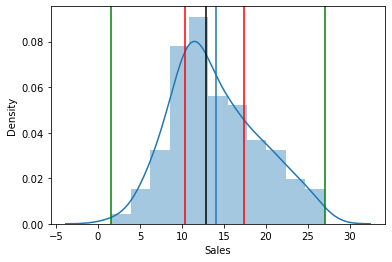

In [24]:
sns.distplot(data.Sales)
plt.axvline(data.Sales.mean())     #to check mean
plt.axvline(data.Sales.quantile(0.),color='g')
plt.axvline(data.Sales.quantile(0.25),color='r')
plt.axvline(data.Sales.quantile(0.5),color='black')
plt.axvline(data.Sales.quantile(0.75),color='r')
plt.axvline(data.Sales.quantile(1.),color='g')
plt.show()

|| Remember the rule of 68:95:99.7 ||

In [26]:
data.Sales.quantile(.50)

12.9

#### Printing quantiles at various intervals

In [31]:
Q = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,1.]
for i in Q:
    print(data.Sales.quantile(Q))
    

0.10     7.960
0.20     9.700
0.25    10.375
0.30    10.870
0.40    11.800
0.50    12.900
0.60    14.800
0.70    16.600
0.75    17.400
0.80    18.920
0.90    21.710
1.00    27.000
Name: Sales, dtype: float64
0.10     7.960
0.20     9.700
0.25    10.375
0.30    10.870
0.40    11.800
0.50    12.900
0.60    14.800
0.70    16.600
0.75    17.400
0.80    18.920
0.90    21.710
1.00    27.000
Name: Sales, dtype: float64
0.10     7.960
0.20     9.700
0.25    10.375
0.30    10.870
0.40    11.800
0.50    12.900
0.60    14.800
0.70    16.600
0.75    17.400
0.80    18.920
0.90    21.710
1.00    27.000
Name: Sales, dtype: float64
0.10     7.960
0.20     9.700
0.25    10.375
0.30    10.870
0.40    11.800
0.50    12.900
0.60    14.800
0.70    16.600
0.75    17.400
0.80    18.920
0.90    21.710
1.00    27.000
Name: Sales, dtype: float64
0.10     7.960
0.20     9.700
0.25    10.375
0.30    10.870
0.40    11.800
0.50    12.900
0.60    14.800
0.70    16.600
0.75    17.400
0.80    18.920
0.90    21.710
1.0

We have seen the target variable, now we will see the independent features


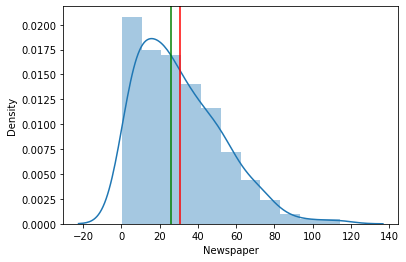

In [38]:
sns.distplot(data.Newspaper)
plt.axvline(data.Newspaper.mean(),color='r')
plt.axvline(data.Newspaper.median(),color='g')
plt.show()

The distribution of column newspaper is clearly skewed
People spend less on newpaper

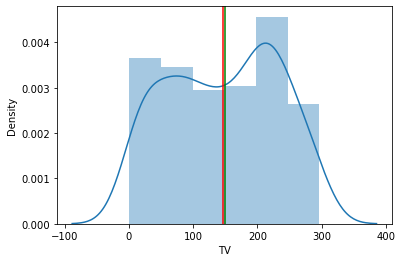

In [39]:
sns.distplot(data.TV)
plt.axvline(data.TV.mean(),color='r')
plt.axvline(data.TV.median(),color='g')
plt.show()

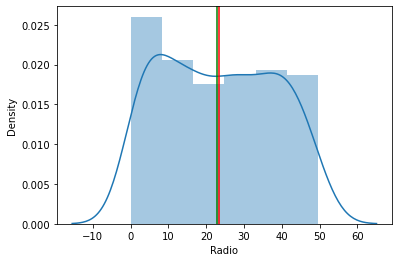

In [40]:
sns.distplot(data.Radio)
plt.axvline(data.Radio.mean(),color='r')
plt.axvline(data.Radio.median(),color='g')
plt.show()

TV and Radio are normallly distributed

In [41]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


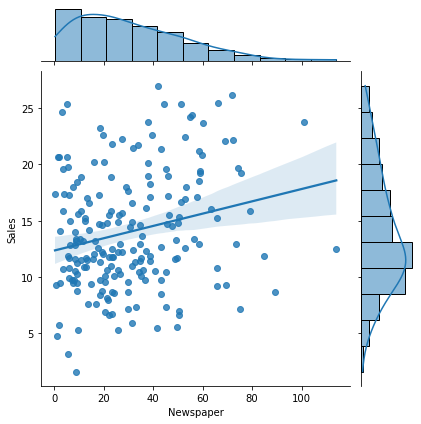

In [44]:
sns.jointplot('Newspaper','Sales',data=data, kind='reg')

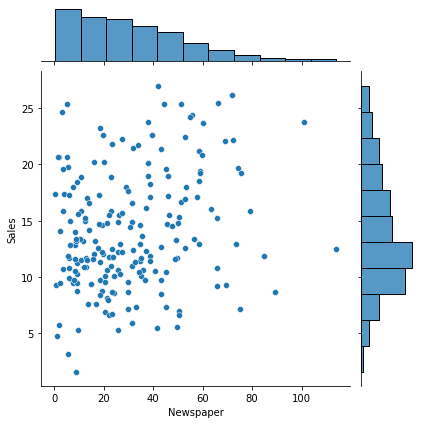

In [45]:
sns.jointplot('Newspaper','Sales',data=data)

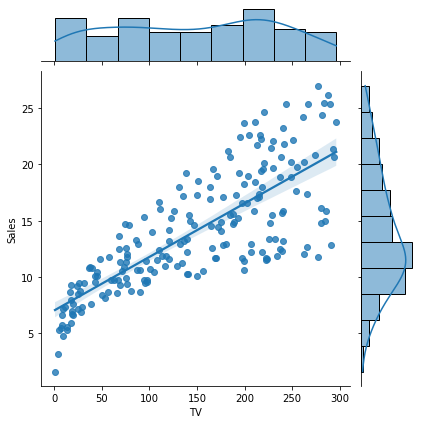

In [46]:
sns.jointplot('TV','Sales',data=data, kind='reg')

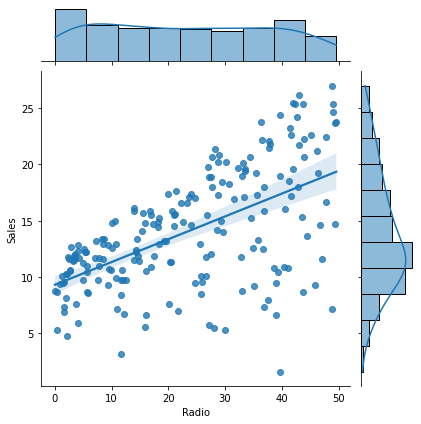

In [47]:
sns.jointplot('Radio','Sales',data=data, kind='reg')

- TV is most important for predicting Sales
- Radio less important comparing to TV for predicting Sales
- Newspaper is least important for predicting sales

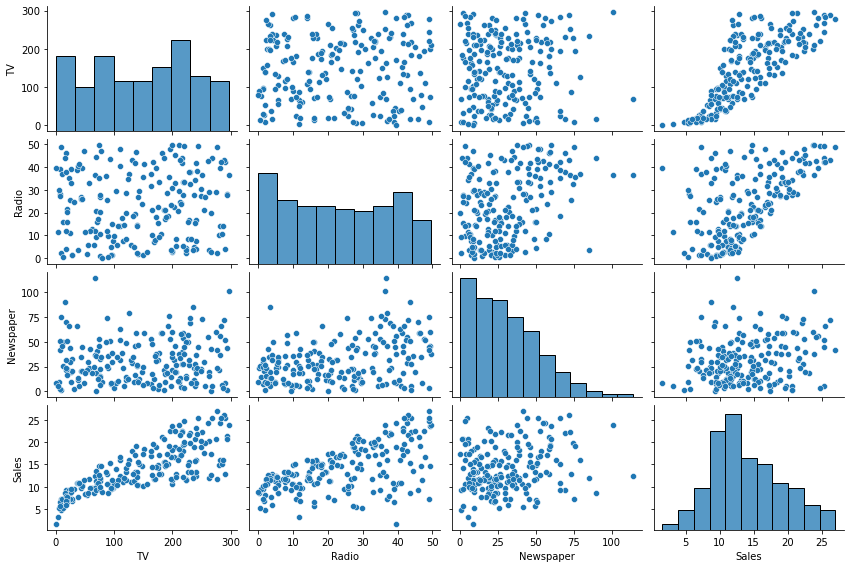

In [50]:
sns.pairplot(data=data, size=2, aspect=1.5)

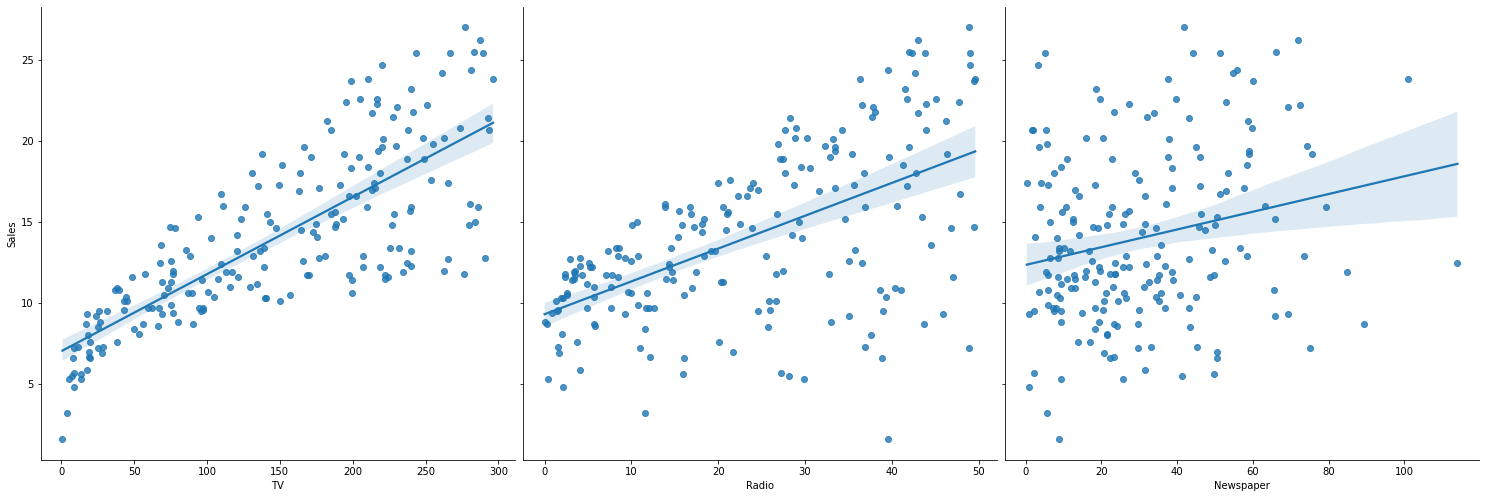

In [53]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], size=7, aspect=1, kind='reg')

In [55]:
corelation= data.corr()
corelation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

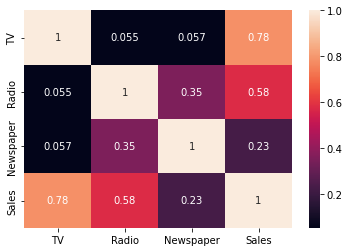

In [58]:
sns.heatmap(corelation, annot=True)

## Data Preparation

In [59]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [60]:
X = data.iloc[:,:-1]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [61]:
y = data.iloc[:,-1]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [62]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


### Splitting data into Test and Train Data for model training


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [64]:
X_train.shape

(160, 3)

In [65]:
y_train.shape


(160,)

In [66]:
X_test.shape

(40, 3)

In [67]:
y_test.shape

(40,)

In [68]:
X_train.describe()

,TV,Radio,Newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


### Standardizing/Scaling

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [70]:
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [72]:
scaler= StandardScaler()
X_train[['TV','Radio','Newspaper']]= scaler.fit_transform(X_train[['TV', 'Radio', 'Newspaper']])

In [73]:
X_train.head()

,TV,Radio,Newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [75]:
X_train.describe()

,TV,Radio,Newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,2.498002e-17,-1.670539e-16,-1.047773e-16
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.728842e+00,-1.592099e+00,-1.367108e+00
25%,-8.754498e-01,-9.437042e-01,-8.630784e-01
50%,8.125819e-02,6.207404e-02,-1.976652e-01
75%,8.245444e-01,8.823534e-01,7.004673e-01
max,1.722510e+00,1.784320e+00,3.310665e+00


In [76]:
X_test[['TV','Radio','Newspaper']]= scaler.transform(X_test[['TV', 'Radio', 'Newspaper']])

In [77]:
X_test.head()

,TV,Radio,Newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


### Modelling using Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [81]:
#y=mx+c
#to see the slope i.e. coeffecients
regressor.coef_

array([ 3.77588591,  2.88656448, -0.05946128])

In [79]:
#y=mx+c
#to see the intercept
regressor.intercept_

14.217500000000001

In [82]:
y_pred_test=regressor.predict(X_test)
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [86]:
y_test

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
183     8.7
6       7.2
147    13.2
13      9.2
153    16.6
62     24.2
126    10.6
181    10.5
155    15.6
81     11.8
8      13.2
34     17.4
131     1.6
38     14.7
75     17.0
184    26.2
146    10.3
46     14.9
160    12.9
61      8.1
124    15.2
180    12.6
186    22.6
123    11.6
45      8.5
17     12.5
56     23.7
151    16.1
112    21.8
23      5.6
190     6.7
130     9.7
5      12.9
84     13.6
107     7.2
Name: Sales, dtype: float64

In [87]:
y_pred_train=regressor.predict(X_train)
y_pred_train

array([12.04236485,  9.22699748, 15.08826616, 16.35778089, 17.07540865,
       13.36661981,  3.78817791, 12.08662048, 15.62955297,  8.68273227,
       10.61195362, 19.36739522, 18.41226024, 15.30372386, 10.00012405,
        8.19743932, 21.49425935, 14.15684188, 16.3171467 ,  8.72677043,
       15.26881361, 12.47602439, 13.7213733 , 14.20527235, 18.32820674,
       19.11937848, 20.32200442, 17.49488834,  9.34748691, 11.75581878,
       19.85996966,  9.91949478, 20.71025022, 23.06178922, 10.08383292,
       17.13980942, 19.65212394, 18.43129662, 16.91732121, 18.37653406,
       17.10374151,  8.84010201,  9.94425907,  5.38665742,  3.58633703,
       16.63361911, 12.58819659, 18.15954096, 11.77376066, 12.69588564,
       13.79647123,  7.01426813, 16.64772647,  9.79703851,  8.13501333,
       15.71731388, 24.83264798, 10.84564094, 21.15206558, 13.84768418,
       10.64154445,  8.46646573, 12.4156824 , 20.48878664, 10.50385731,
       14.51608774, 16.33763035, 17.16954682, 13.18269257, 17.34

In [88]:
y_train

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: Sales, Length: 160, dtype: float64

### Evaluating the model 

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
MAE_train= mean_absolute_error(y_train,y_pred_train)
MAE_test= mean_absolute_error(y_test, y_pred_test)
print(MAE_train,"   ||   ",MAE_test)

1.2131871622729427    ||    1.3617813502090281


In [92]:
MSE_train= mean_squared_error(y_train,y_pred_train)
MSE_test= mean_squared_error(y_test, y_pred_test)
print(MSE_train,"   ||   ",MSE_test)

2.4068147558189064    ||    4.402118291449686


In [93]:
RMSE_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
RMSE_test= np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train,"   ||   ",RMSE_test)

1.5513912323520802    ||    2.098122563495681


In [94]:
r2_train= r2_score(y_train,y_pred_train)
r2_test= r2_score(y_test, y_pred_test)
print(r2_train,"   ||   ",r2_test)

0.9067114990146382    ||    0.8601145185017868


> Industry accepted standards r2_test should be more than 85%

In [95]:
X_train.shape

(160, 3)

In [97]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)

160 3


In [98]:
num = (1-r2_train)*(n-1)
dem = n-p-1
Adj_r2_train= 1-(num/dem)
Adj_r2_train

0.9049174893803044

In [99]:
X_test.shape

(40, 3)

In [100]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)

40 3


In [101]:
num = (1-r2_test)*(n-1)
dem = n-p-1
Adj_r2_test= 1-(num/dem)
Adj_r2_test

0.8484573950436023

#### We performed the experiment
>1. 80-20 split, random state=0
>2. Standard Scaling
>3. Linear Regression

- Result:
>Adjusted r2_train = 90%
>Adjusted r2_test = 84.8%